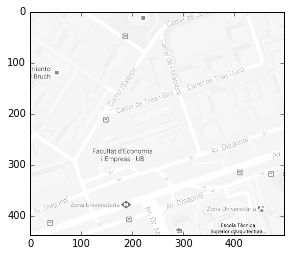

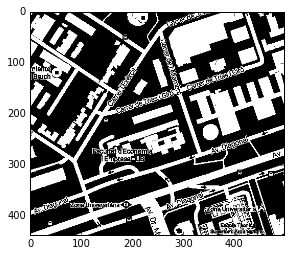

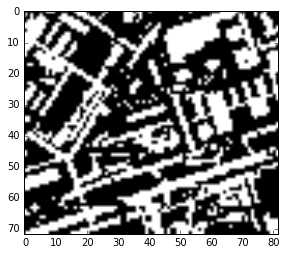

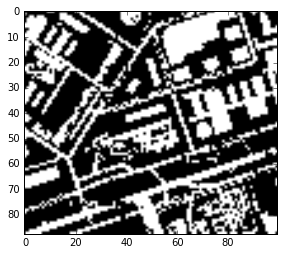

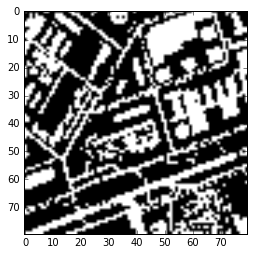

In [37]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import binascii

#experiment with higher and lower resolution
imgB = cv2.imread('map_big.png',  cv2.CV_LOAD_IMAGE_GRAYSCALE)
imgS = cv2.imread('map_small.png',  cv2.CV_LOAD_IMAGE_GRAYSCALE)

## uncomment if used outside of jupyter notebook
# cv2.imshow('image',imgB)
# cv2.waitKey(0) & 0xFF
# cv2.destroyWindow('image') 

# grayscaled image
plt.imshow(imgB, cmap='Greys_r')

# thresholding the grayscaled image
tresh = 235
ret, imgB_tresh = cv2.threshold(imgB,tresh,255,cv2.THRESH_BINARY)
ret, imgS_tresh = cv2.threshold(imgS,tresh,255,cv2.THRESH_BINARY)

plt.figure()
plt.imshow(imgB_tresh, cmap='Greys_r')

plt.figure()
plt.imshow(imgS_tresh, cmap='Greys_r')


# rescaling the higher resolution image with cv2
small = cv2.resize(imgB_tresh, (0,0), fx=0.2, fy=0.2) 
plt.figure()
plt.imshow(small, cmap='Greys_r')


# rescaling the higher resolution image with skimage (probably better)
from skimage import data
from skimage.transform import resize

small2 = resize(imgB_tresh, (80, 80))
plt.figure()
plt.imshow(np.round(small2), cmap='Greys_r')

# translating binary image to a bit strind
flat = np.round(small2).flatten().astype(int).astype(str)
s = ""
for e in flat:
    s = s + e


In [33]:
def encode(bit_string):
    key = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789abcdefghijklmnopqrstuvwxyz:;"
    
    ascii_string = ""
    for i in range(0,len(s)-5,6):
        block = s[i:i+6]
        block_id = int("0b"+block,2)

        ascii_string = ascii_string + key[block_id]

    return ascii_string

def decode(ascii_string):
    key = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789abcdefghijklmnopqrstuvwxyz:;"
    
    bit_string = ""
    for c in ascii_string:
        dec = key.index(c)
        temp = bin(dec)
        temp = temp[2:]
        for i in range(6-len(temp)):
            bit_string = bit_string+'0'
            
        bit_string = bit_string + temp
    
    # for 80x80 picture add 0000 at the end of the bit string
    bit_string = bit_string + "0000"
        
    return bit_string

In [39]:
x = encode(s)
y = decode(x)
print s[0:30]
print y[0:30]

print x[0:6]

print len(s), len(y)

print s[6350:]
print y[6350:]

x


100000011000000011000000010000
100000011000000011000000010000
6YDAQ5
6400 6400
00000000001111001111100110111111110101101011000111
00000000001111001111100110111111110101101011000000


'6YDAQ5aACu;6qC622IPuADm;:LAkH76BgAE7;:6u5m:OA561D;yIGPudnmDnHD;uDBp:E4GAAGH;:BQ2PEDumALH;;9qDtpI2DAEn;;zz7;up7AYA2;;;5e2yZuADAF5;;twAGMyAA2GD;;muyHxOYAR78;;6AFPpDcADMQP;mAB5y1pAAviL;:ADX8L3mA4GA5:AH:DdkYAH7AX:AB:9nzaADmmFyAAPeyHyAAuIZlAODwPT:mA4GGLmP6n7sp:AGBBcmDyDm4S:mDBQ3mQ4JmHkXPAmQHEyDK6HxjGYMEAn5A1AB4C7DGAAOdu2AAcBy6N6mDbyVAAv6PYA6QuZMlABOMmaAMCMGIoAApp2DAFpHAF6ADOy:A6Fl76DmEavdPaYDqmYHyP;OZtpEAvEAF1Ptvd52oAEtAX6Tv:Z;GY6DLA5AEH4d5niQAqm2AB7tv;yDMAlJlA4I2;y;ACAIcwA;8HluHuB6C5yA;mmxyB:IABq6B;6EP;65DAA1YA;ABHtuGAmAMbAOAM17:AAA6F1AAAP8C5mAAYDE6AA5I7xyAHcAoYAA;0I:;AHjy3iAA:ApPkAJDddTBB:myTwAPAitj7pyzpE2A4AAruQpq5jv6AsAAGYMLoDpyIDSQA6oCCRm5:CBcAAIHB8APPvAoyA6OAYQMqMsAHuAEFmDMBHuAAH6QA3uA4AJ26ANAAA;AAZ6AQIAPQOA;6A2IDAAA4H67;AAmCA64A4AAD;ANmQmIynyAAD:A46:MCiH:AAHyAY7;7BuHmmAHuAzF;uRuP6EAPuBvA;yHm1AAQ5mBuAPyAm4AAE;mBoAHuAI2AAB;;;sEAuAD2AAB;D5qAAAAA2AAB:AUi3AAAA2AAD:6LJ;6AAAzAAHyI2eOe6ABYYAH:CXuCo6AAaEAL;mzuH:uABeMCLf:aSCNMQHMAM5uD:m8HR2CmAB;6Dy6I1CVAmAA;6D;6GDTmAAAB;ADdmB76xD6AB;6H7yAIAxS

In [42]:
a = "1000000110000000110000000100000111111001000000000000101110001111111000001101000000101000000111000111000010000011111110000000000000111100001111111111100010110000001011100001111000011000000000011010100000000001001000011111111111101000001110000111111100001111100011100000000111111000000110110000111111111111000010000001100011111110001001111100011100000000111100010001110000111111111110000000110000011100111111100001000111100001100000000000000001100001111111111111100000010100000111000011110001000000111110001100000000000010110001111111111111111000111101000000111101111100110010000111000000110000000001001100011111111111111111011111011000011111111110001100111000010000000110000000000111001111111111111111110111111010000111001111000110011110000000000000110000000001010111111111111111111101111110100000000001100011001111000000000000000111000001100000111111111111111100001110001111000001111110110011100110000000000100011000011000101111111111111000000000000001010011111100110000111001100000000000110011000100000011111111111100000000000000010111111111000110111100110000000000001110011011000010111111111111100000000000110101111000100010110111011100000000000111100001100000000111111111100000000001111111100000111001111011100110000000000001111000010000000101111111100000000000011111101000111100011111011001000000000000111100001100000001011111000000000000000011111010001111000001111111000000000000001110000010000110011011110000000011100000111110100011110100111111101100000000000111100001100001100010111100000011111000001100011000011101101100111111100000000001100000010000011001101100000000111111000000111100000111100100101111101100000000110000010100000111011100000100000111100010011100000001111011100101110011110000001100000100000001110001001111000000110010101000000001111110111011010001100110000011000001000000001100010111110000000110110000000000010111100000101000010000110001100000000000000011101001111110000111000000000000001001100000011111001000000011011000001100000000111001011111000101010000000000001110011000000011110110000000001000000100001110000110010011001011110000000000010011100011001100001001000000000011000000100011000001100010001100100000000000001100111100110111000000110000000001011100110001110000000001011000000000000000110011101111001111100000001000000001011011111000011000000000111100000001001001001110011001110011111001000110000000111101001100000110000001111111000011111111110011100110011101111100110001000000001110010001000000000001010110110011111101111110011001110111110111001100100000000001001101110000000101111000000100111110011111100110011111110001100110001000000000110010110000000111110000000001000001110111101001110111111100011011000100000000001101001100000111000000000000011000011101111110011111111111000000110011000000001011110010011011110000000111100010000111001111111111001111110000000000100000000010001001101110100000001111111000100001111011111110000001111110000000011000000000100111111111000000001111111100001100001110111111000000011111100010000000000000011101001000000000011111111000000001000011111111111000000111110000110000000000000110110110000000001111110000000000010001111101111110000001100000001100000000000011001001010000000011100000000011000110111000011111100000000000000000001000000001010110110000000000000000000011111000100000100111111100000000000000000110000000110001001000000000000000000111110010001000011110111111000000000001111001100000001100100110000000000000001111110110100010001111101111110000000001111011011111000111011011000000000000001111100000001100110011111011100000000010010000111001111001110100110000010000011111101100001111000100111110100000000011110000001011001101111011011000011100111111001111011100110001000111000000000111100000000000001101011110000100001100111101000111111011011110011000000000001101100000000000000001100110000011000010111100100000111100111111000010000000110100100100000000001000001100100000100000100100011100000111111111100000100000011001100000000000000010000001110000011000100000000011110011111110010000001100101111000000001000000011100000000110000100000011001101000011001101100000000001111110000000000001000001011100000000110011000000010001111110000000000000000001111000000100000000000111011110000000000111100000000010010111001000000000000011010000000000000000001111110000000000000110011000000000000100000010000000000011110100000011100000001111111000000000000111000010000000110000000000000000000111100001111000001000011111110000000000001100000000100000001000000111100000000111100000000000000000111111110000000011011100000100001100000010001111001100011111000000000000000000111111100000000111101000001111100011000000101011000001111111100000000000000001111111000000000110001000011111111000010000011110000001111100001100000000000001111110000000001111010001011111111110000100011110000011111000000001000000000011111110000000011110010000001111111111000001111100000110110000000000000100000111111100000000011110000000000011111111000000001100000111100000000000000001001111111100000000011100100000000001111110000000000010000111000000000000000000011111111111111111111101100001000000001110000000000000110111000000000000000000011111110000110111111101000000000000000000000000000000000111000000000000000000011111100000000101001011000111010000000000000000000000000111000000000000000000111111101000000010110010011111111000000000000000000000001111010000000000000001111111000010000111001010000011101010001000000000000000010110000110000000000001111111100000100101111110000000101100101000000000000000001001000001000000000010111111111100001111011110000001111111101110000000000000011010000011000000100010111010011111101001000100100000100011010011000100000001110011000000000011000111111110000000111111101100001000100001110100010111000000101100000000000000011111111000000000111111001000000010000110110000100101010000001100000000000000001111111000000000111111111000000001100000110100111100000000000000000000000000011111110000000000111001111100000000011000011000001110110000111000000000000000011111111000000001111000011111000000000010000000001110110100100110110000000000111111100001000011110000000011110000001100100010011111111110001001111100000000111111100000001111100000000000111110001111101011110100000000100000011111000001111111000000000111100000000000001111100111111010001100101011011110000011110001111110000000001111000000000000000000111001001110101110100000000110000100111111111110000000011110000000000000000000001111001111100110111111110101101011000000"

b = "6YDAQ5aACu;6qC622IPuADm;:LAkH76BgAE7;:6u5m:OA561D;yIGPudnmDnHD;uDBp:E4GAAGH;:BQ2PEDumALH;;9qDtpI2DAEn;;zz7;up7AYA2;;;5e2yZuADAF5;;twAGMyAA2GD;;muyHxOYAR78;;6AFPpDcADMQP;mAB5y1pAAviL;:ADX8L3mA4GA5:AH:DdkYAH7AX:AB:9nzaADmmFyAAPeyHyAAuIZlAODwPT:mA4GGLmP6n7sp:AGBBcmDyDm4S:mDBQ3mQ4JmHkXPAmQHEyDK6HxjGYMEAn5A1AB4C7DGAAOdu2AAcBy6N6mDbyVAAv6PYA6QuZMlABOMmaAMCMGIoAApp2DAFpHAF6ADOy:A6Fl76DmEavdPaYDqmYHyP;OZtpEAvEAF1Ptvd52oAEtAX6Tv:Z;GY6DLA5AEH4d5niQAqm2AB7tv;yDMAlJlA4I2;y;ACAIcwA;8HluHuB6C5yA;mmxyB:IABq6B;6EP;65DAA1YA;ABHtuGAmAMbAOAM17:AAA6F1AAAP8C5mAAYDE6AA5I7xyAHcAoYAA;0I:;AHjy3iAA:ApPkAJDddTBB:myTwAPAitj7pyzpE2A4AAruQpq5jv6AsAAGYMLoDpyIDSQA6oCCRm5:CBcAAIHB8APPvAoyA6OAYQMqMsAHuAEFmDMBHuAAH6QA3uA4AJ26ANAAA;AAZ6AQIAPQOA;6A2IDAAA4H67;AAmCA64A4AAD;ANmQmIynyAAD:A46:MCiH:AAHyAY7;7BuHmmAHuAzF;uRuP6EAPuBvA;yHm1AAQ5mBuAPyAm4AAE;mBoAHuAI2AAB;;;sEAuAD2AAB;D5qAAAAA2AAB:AUi3AAAA2AAD:6LJ;6AAAzAAHyI2eOe6ABYYAH:CXuCo6AAaEAL;mzuH:uABeMCLf:aSCNMQHMAM5uD:m8HR2CmAB;6Dy6I1CVAmAA;6D;6GDTmAAAB;ADdmB76xD6AB;6H7yAIAxS1AD:EPAPAoJ;udmD:A:ADu:lQCByHyA4AA:5eojuPHuAyAADawwAYT;uBuAAAy:1;Wi"

c = decode(b)

print a==c
len(c)

True


6400